In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
np.random.seed(0)

# Importing the Data

In [2]:
df=pd.read_csv('Company_Data.csv')

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# Performing EDA and Visualization of the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc']) 

In [7]:
label_encoder = preprocessing.LabelEncoder()
df['Urban']= label_encoder.fit_transform(df['Urban']) 

In [8]:
label_encoder = preprocessing.LabelEncoder()
df['US']= label_encoder.fit_transform(df['US'])

In [9]:
df['High'] = df.Sales.map(lambda x: 1 if x>=8 else 0)

In [10]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [11]:
df["ShelveLoc"].value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

<AxesSubplot:>

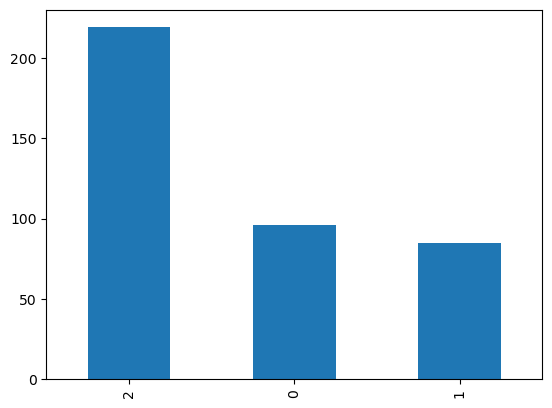

In [12]:
val_counts=df['ShelveLoc'].value_counts()
val_counts.plot.bar()

In [13]:
df["Urban"].value_counts()

1    282
0    118
Name: Urban, dtype: int64

<AxesSubplot:>

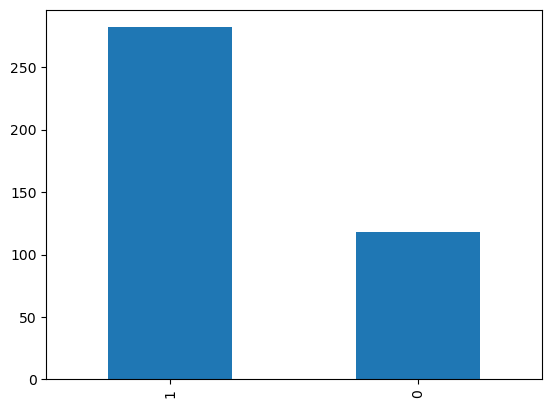

In [14]:
val_counts=df['Urban'].value_counts()
val_counts.plot.bar()

In [15]:
df["US"].value_counts()

1    258
0    142
Name: US, dtype: int64

<AxesSubplot:>

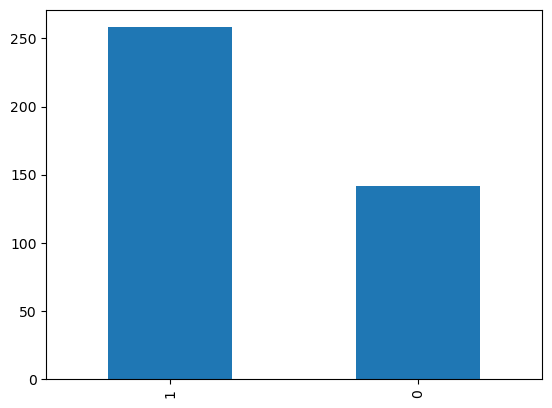

In [16]:
val_counts=df['US'].value_counts()
val_counts.plot.bar()

# Splilting the data into Train and Test

In [17]:
x=df.drop(['Sales','High'],axis=1)
y=df['High']

In [18]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [19]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: High, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 40)

In [21]:
print(x_train)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
189        118     117           18         509    104          2   26   
396        139      23            3          37    120          2   55   
299        135      40           17         497     96          2   54   
347         96      39            0         161    112          1   27   
282        150      96            0          80    154          1   61   
..         ...     ...          ...         ...    ...        ...  ...   
306        131      32            1          85    133          2   48   
165        147      58            7         100    191          0   27   
7          136      81           15         425    120          1   67   
219        116      79           19         359    116          1   58   
326        133      30            0         152    122          2   53   

     Education  Urban  US  
189         15      0   1  
396         11      0   1  
299         17      0   1  

### Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [23]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Training the Random Forest Classification model on the Training data

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 40)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=40)

In [25]:
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=40)

In [26]:
classifier.score(x_test, y_test)

0.76

### Predicting the Test set results

In [27]:
y_pred = classifier.predict(x_test)

In [28]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)

In [30]:
print(cm)

[[56 10]
 [14 20]]


In [31]:
accuracy_score(y_test, y_pred)

0.76

In [32]:
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [33]:
classifier.score(x_test, y_test)

0.87